# Trabalho da Matéria de algoritmos

   **Nesse trabalho foi proposto realizar a analise da bases de dados iris, com o algoritmo k-means.**
   
   *primeiro nós tratamos a base de dados, com normalização e ao final temos os gráficos tanto uma comparação do modelo criado com a base original, quanto com 4 clusters como foi achado no calculo da soma dos erro quadrados.*

# Importação dos pacotes 

In [47]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans

In [3]:
iris = pd.read_csv("C:/Users/joaob/OneDrive/Documentos/2 semestre/algoritmos_ciencia_de_dados/iris.csv")

# Visualização da base de dados

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Visualiação do formato de cada coluna

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Plot da base de dados com a coluna Variety como referencia

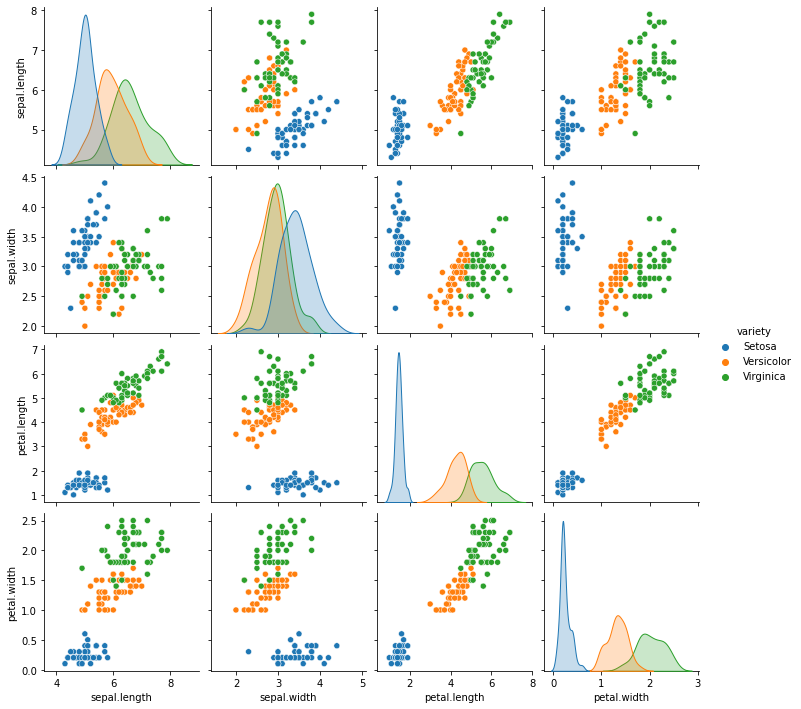

In [49]:
sns.pairplot(iris, hue='variety')

# Instanciando a coluna variaty do resto do DataFrame.

   *A coluna variaty é a coluna com os nomes das especies*

In [6]:
variavel_iris = iris.drop(['variety'], axis = 1)

In [7]:
variavel_iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Normalização dos dados

In [8]:
iris_normal = (variavel_iris - variavel_iris.min())/(variavel_iris.max()-variavel_iris.min())
iris_normal

,sepal.length,sepal.width,petal.length,petal.width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [9]:
iris_normal.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# Função que calcula o wcss

In [13]:
def calcula_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit (iris_normal)
        wcss.append(kmeans.inertia_)
        
    return wcss

# Valores dos erros quadrados

In [14]:
calcula_wcss(iris_normal)

[41.16611042137328,
 12.127790750538193,
 6.982216473785235,
 5.516933472040375,
 4.5809486401172945,
 3.962498017839448,
 3.493520381549728,
 3.1456415905967807,
 2.8107282524179267,
 2.5483833021134363]

# Plot de grafico( Procuramos o joelho do gráfico)

   **Nesse grafico temos o k = 2**

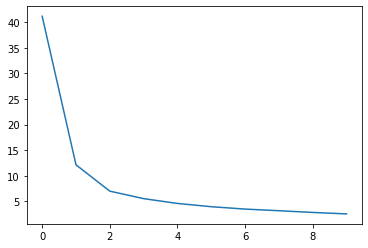

In [15]:
plt.plot(calcula_wcss(iris_normal))
plt.show()

# Função para carregar o numeri de clusters com soma dos erros quadrados

In [16]:
def numero_cluster(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 11, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
        
    return distancia.index(max(distancia)) + 2

In [17]:
soma_quadrada=calcula_wcss(iris_normal)

n = numero_cluster(soma_quadrada)

kmeans = KMeans(n_clusters=n)

# Variavel caminhas carrega o falor de k

   **Encontramos o valor de**
   # k = 4

In [18]:
print(kmeans)

KMeans(n_clusters=4)


# Calcular a Média de K

   **Como encontramos dois valores diferentes de k, com a curva do joelho encontramos o valor de k=2, e com o calculo da soma dos erros quadrados encontramos valor de k=4, vamos realizar a media desses dois valores para encontrar o k que vamos utilizar.**

In [46]:
dados = ([2, 4])
media = np.mean(dados)
print(media)

3.0


*Encontramos o valor de k = 3 para trabalho com a clusterização*

# Criação do modelo 

In [50]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [53]:
kmeans.fit(variavel_iris)

KMeans(n_clusters=3, random_state=0)

# Visualização do modelo criado 

   *Cada valor desse é um tipo de flor*

In [54]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

**Foi adicionada ao DataFrame original iris, uma coluna chamada k-classes, que levam os labels para o DataFrame.**

In [55]:
iris["k-classes"] = kmeans.labels_

**Conseguimos ver que as virginicas e as versicolor são bem parecidas em alguns aspectos, o k-means teve alguns erros**

In [57]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,k-classes
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0


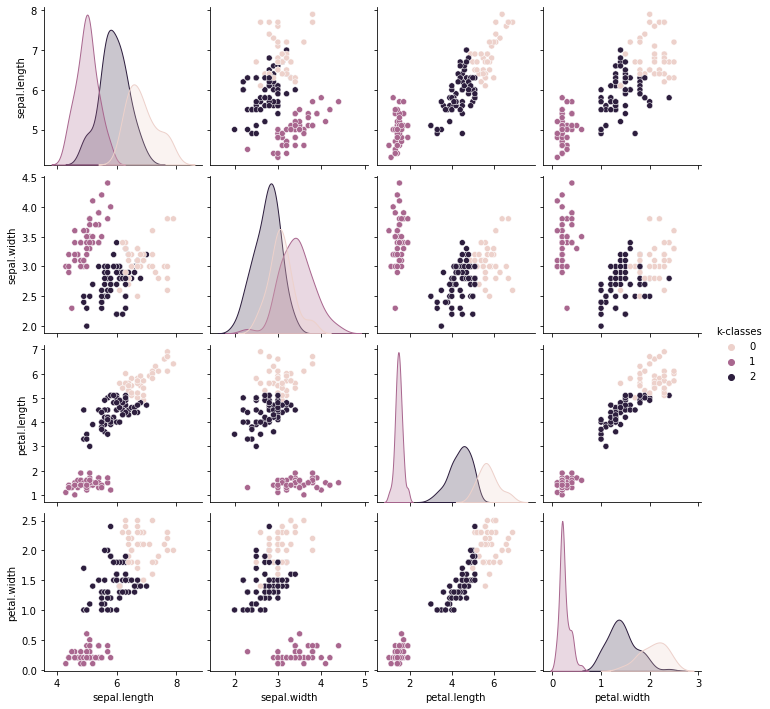

In [59]:
sns.pairplot(iris, hue = 'k-classes')

# Comparação entre o modelo criado e o DataFrame original.

   **Do lado esquedo da imagen temos os graficos com a coluna dos nomes das especies, e do lado direto temos o modelo criado.**
   
   *Percebemos que não temos muita diferença entre os dois dados, o modelo criado, foi bem acertivo.*

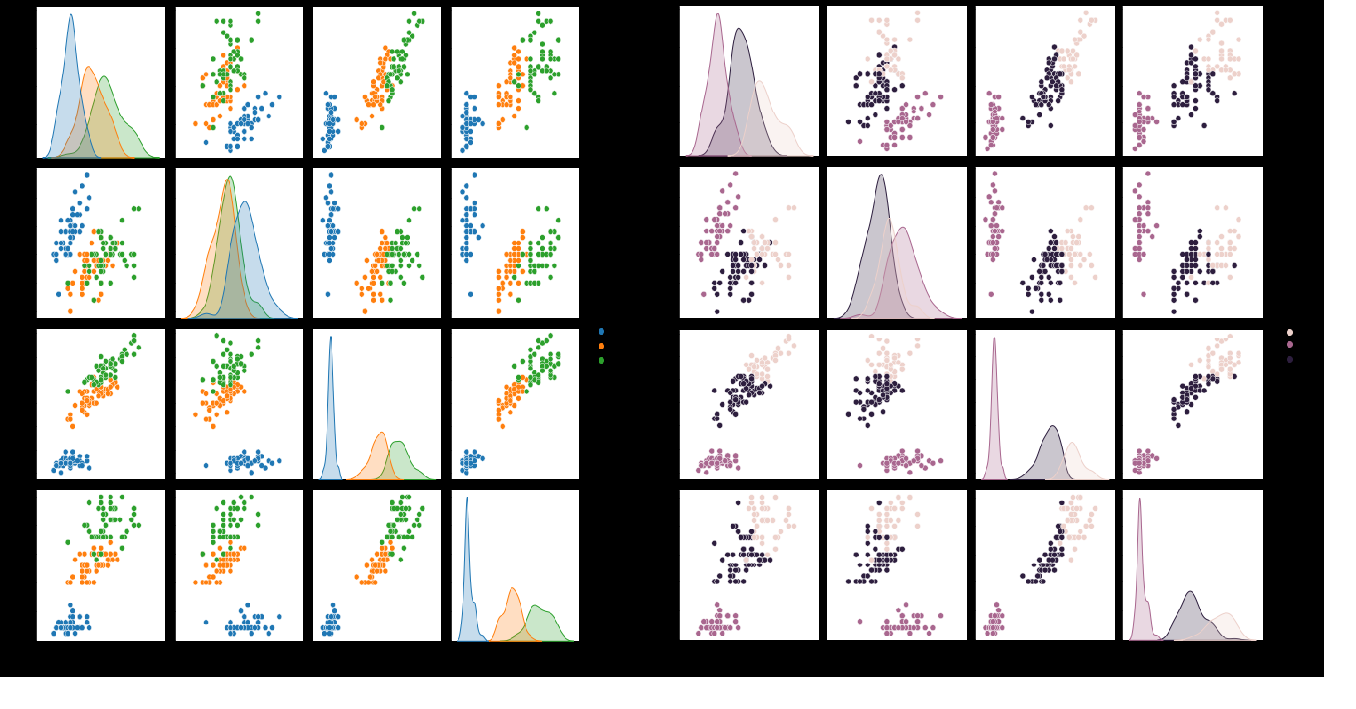

# Clusterização com Weka 

   **Podemos ver os mesmos dados com 3 numeros de clusters, e as semalhancas entre as do grupo versicolor que são os azuis e as virginicas que são os verdes.**

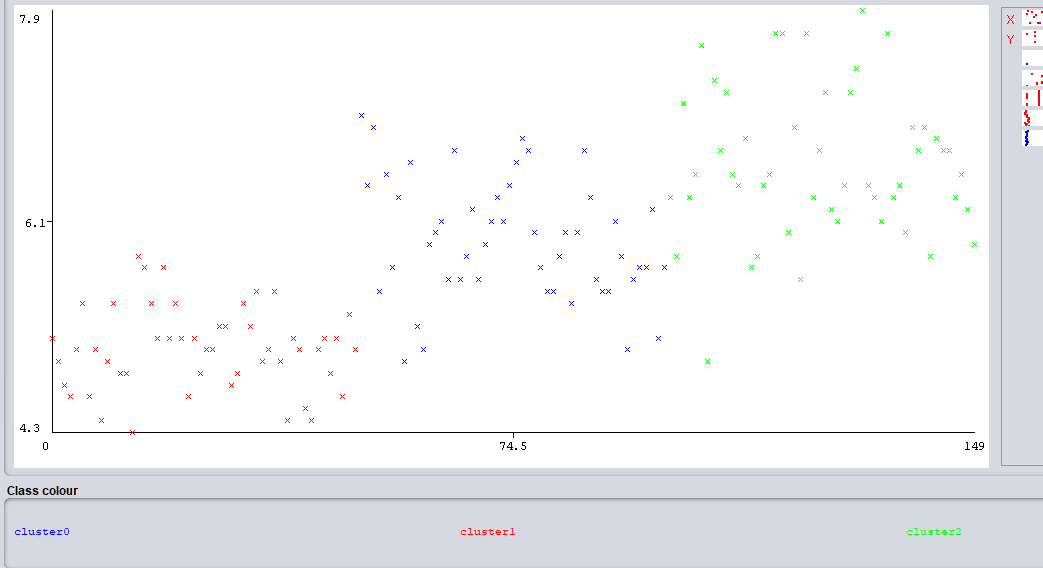

# Teste com 4 Clusters.


**Essa semelhança e mais especifica se criarmos um modelo com 4 clusters.**

   *As verginicas e versicolors se misturam formando uma outra classe.*

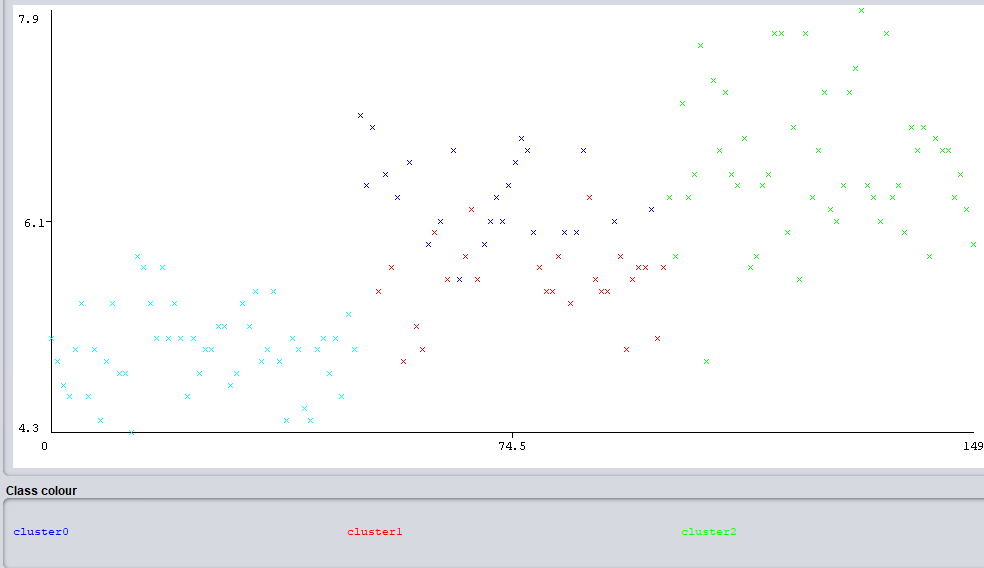